# Workshop 1 - Titanic

### Emilio Espinosa and Saffian Asghar

In [632]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

##### Train.csv = titanic_data

In [633]:
# Read CSV file
titanic_data = pd.read_csv('../workshop_2_titanic/train.csv', index_col='PassengerId')
titanic_test = pd.read_csv('../workshop_2_titanic/test.csv', index_col='PassengerId')
titanic_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [634]:
# shape of data
titanic_data.shape
titanic_test.shape

(418, 10)

In [635]:
# types of data
titanic_data.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [636]:
# first rows 
titanic_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [637]:
# last rows
titanic_data.tail()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [638]:
# titanic sample 5
titanic_data.sample(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
621,0,3,"Yasbeck, Mr. Antoni",male,27.0,1,0,2659,14.4542,NaN,C
441,1,2,"Hart, Mrs. Benjamin (Esther Ada Bloomfield)",female,45.0,1,1,F.C.C. 13529,26.2500,NaN,S
688,0,3,"Dakic, Mr. Branko",male,19.0,0,0,349228,10.1708,NaN,S
601,1,2,"Jacobsohn, Mrs. Sidney Samuel (Amy Frances Chr...",female,24.0,2,1,243847,27.0000,NaN,S
432,1,3,"Thorneycroft, Mrs. Percival (Florence Kate White)",female,NaN,1,0,376564,16.1000,NaN,S


In [639]:
# Descriptive stats
titanic_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [640]:
titanic_test.describe()

,Pclass,Age,SibSp,Parch,Fare
count,418.000000,332.000000,418.000000,418.000000,417.000000
mean,2.265550,30.272590,0.447368,0.392344,35.627188
std,0.841838,14.181209,0.896760,0.981429,55.907576
min,1.000000,0.170000,0.000000,0.000000,0.000000
25%,1.000000,21.000000,0.000000,0.000000,7.895800
50%,3.000000,27.000000,0.000000,0.000000,14.454200
75%,3.000000,39.000000,1.000000,0.000000,31.500000
max,3.000000,76.000000,8.000000,9.000000,512.329200


In [641]:
# including objects 
titanic_data.describe(include='object')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [642]:
# information
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [643]:
titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


<AxesSubplot:ylabel='PassengerId'>

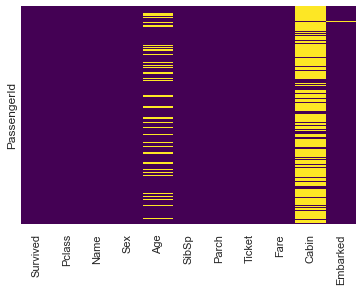

In [644]:
sns.heatmap(titanic_data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

<AxesSubplot:ylabel='PassengerId'>

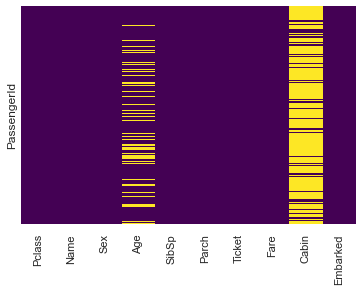

In [645]:
sns.heatmap(titanic_test.isnull(), yticklabels=False, cbar=False, cmap='viridis')

C:\Users\52333\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


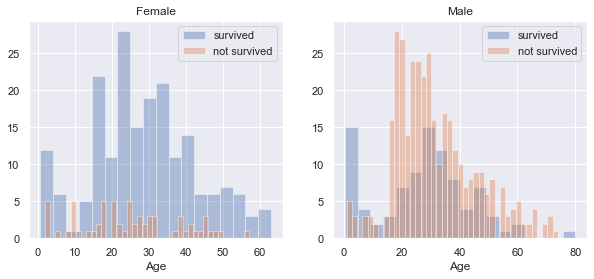

In [646]:
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = titanic_data[titanic_data['Sex']=='female']
men = titanic_data[titanic_data['Sex']=='male']
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')

In [647]:
titanic_data[titanic_data.Age.isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...
860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S


In [648]:
titanic_data[titanic_data.Cabin.isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S


In [649]:
titanic_data[titanic_data.Embarked.isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


<AxesSubplot:>

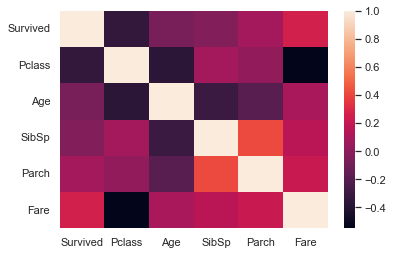

In [650]:
# Initial correlations
sns.heatmap(data=titanic_data.corr())

In [651]:
# replace values in Age category with average age of passenger of each class
lst1=[]
lst2=[]
lst3=[]
n=len(titanic_data.Survived)
i=1
while i< n:
    if titanic_data['Pclass'][i]==1 and pd.isnull(titanic_data['Age'][i]) == False:
        lst1.append(titanic_data['Age'][i])
    elif titanic_data['Pclass'][i]==2  and pd.isnull(titanic_data['Age'][i]) == False:
        lst2.append(titanic_data['Age'][i])
    elif titanic_data['Pclass'][i]==3 and pd.isnull(titanic_data['Age'][i]) == False :
        lst3.append(titanic_data['Age'][i])
    i+=1

Mean_Pclass_1 = sum(lst1)/len(lst1)
Mean_Pclass_2 = sum(lst2)/len(lst2)
Mean_Pclass_3 = sum(lst3)/len(lst3)


def impute (col):
    Age= col[0]
    Pclass = col[1]
    
    if pd.isnull(Age):
        
        if Pclass ==1:
            return Mean_Pclass_1
        elif Pclass ==2:
            return Mean_Pclass_2
        else:
            return Mean_Pclass_3
    else:
        return Age

In [652]:
# Age mean
#age_mean = titanic_data['Age'].mean()
#age_mean
print(Mean_Pclass_1)
print(Mean_Pclass_2)
print(Mean_Pclass_3)

38.233440860215055
29.87763005780347
25.121242937853108


In [653]:
# Applying mean into age column missing values
#titanic_data.loc[titanic_data.Age.isnull(), 'Age'] = age_mean
#titanic_data.info()
#titanic_test.loc[titanic_test.Age.isnull(), 'Age'] = age_mean
#titanic_test.info()

In [654]:
# Apply mean to data missing
titanic_data.Age= titanic_data[['Age', 'Pclass']].apply(impute, axis=1)
titanic_test.Age= titanic_test[['Age', 'Pclass']].apply(impute, axis=1)

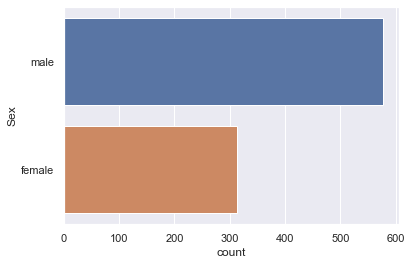

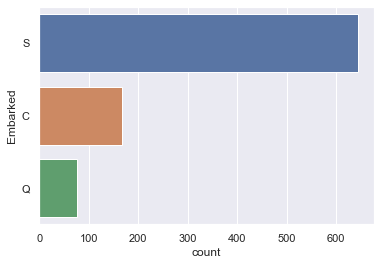

In [655]:
# graphic of categorical variables
for column in titanic_data.select_dtypes(include='object'):
    if titanic_data[column].nunique() < 10:
        sns.countplot(y=column, data=titanic_data)
        plt.show()

In [656]:
# lambda function to delete cabin number while leaving the letter and applying an "x" to missing value
titanic_data['Cabin'] = titanic_data.Cabin.apply(lambda c: c[0] if type(c) == str else 'X')
titanic_data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,X,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,C
3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,X,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C,S
5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,X,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,X,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,25.121243,1,2,W./C. 6607,23.4500,X,S


In [657]:
# lambda function to delete cabin number while leaving the letter and applying an "x" to missing value
titanic_test['Cabin'] = titanic_test.Cabin.apply(lambda c: c[0] if type(c) == str else 'X')
titanic_test

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.500000,0,0,330911,7.8292,X,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.000000,1,0,363272,7.0000,X,S
894,2,"Myles, Mr. Thomas Francis",male,62.000000,0,0,240276,9.6875,X,Q
895,3,"Wirz, Mr. Albert",male,27.000000,0,0,315154,8.6625,X,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.000000,1,1,3101298,12.2875,X,S
...,...,...,...,...,...,...,...,...,...,...
1305,3,"Spector, Mr. Woolf",male,25.121243,0,0,A.5. 3236,8.0500,X,S
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,0,0,PC 17758,108.9000,C,C
1307,3,"Saether, Mr. Simon Sivertsen",male,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,X,S


In [658]:
# fill missing values with mode
titanic_data['Embarked'].mode()
titanic_data.loc[titanic_data.Embarked.isnull(), 'Embarked'] = 'S'
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     891 non-null    object 
 10  Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 115.8+ KB


In [659]:
# replace S,C,Q with numerical values
titanic_data['Embarked'].replace(['S','C','Q'],[1,2,3],inplace=True)
titanic_test['Embarked'].replace(['S','C','Q'],[1,2,3],inplace=True)

In [660]:
# Caluclating family members. if 0 is alone
titanic_data['Family'] = titanic_data['SibSp'] + titanic_data['Parch'] 
titanic_test['Family'] = titanic_test['SibSp'] + titanic_test['Parch'] 

In [661]:
# converting to numerical
titanic_data.Sex.replace(['male', 'female'], [1,0], inplace=True)
titanic_test.Sex.replace(['male', 'female'], [1,0], inplace=True)

In [662]:
titanic_data.loc[titanic_data['Cabin'] == 'T', 'Cabin'] = 'X'

In [663]:
titanic_test[titanic_test.Fare.isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family
PassengerId,,,,,,,,,,,
1044,3,"Storey, Mr. Thomas",1,60.5,0,0,3701,NaN,X,1,0


In [664]:
# Replacing missing value with mean that matches the selection
Fare_missing = titanic_test[(titanic_test.Pclass == 3) & (titanic_test.Sex == 1)& (titanic_test.Family == 0)& (titanic_test.Embarked == 1)& (titanic_test.Cabin == 'X')].Fare.mean()
titanic_test.loc[titanic_test.Fare.isnull(), 'Fare'] =Fare_missing

In [665]:
titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    int64  
 3   Age       418 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      418 non-null    float64
 8   Cabin     418 non-null    object 
 9   Embarked  418 non-null    int64  
 10  Family    418 non-null    int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 39.2+ KB


In [666]:
# converting categorical variables into numerical while saving in a new d
titanic_cleaned = pd.get_dummies(titanic_data[['Survived', 'Pclass', 'Sex',\
                             'Age', 'Family', 'Fare', 'Cabin', 'Embarked']])
titanic_cleaned

,Survived,Pclass,Sex,Age,Family,Fare,Embarked,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_X
PassengerId,,,,,,,,,,,,,,,
1,0,3,1,22.000000,1,7.2500,1,0,0,0,0,0,0,0,1
2,1,1,0,38.000000,1,71.2833,2,0,0,1,0,0,0,0,0
3,1,3,0,26.000000,0,7.9250,1,0,0,0,0,0,0,0,1
4,1,1,0,35.000000,1,53.1000,1,0,0,1,0,0,0,0,0
5,0,3,1,35.000000,0,8.0500,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,1,27.000000,0,13.0000,1,0,0,0,0,0,0,0,1
888,1,1,0,19.000000,0,30.0000,1,0,1,0,0,0,0,0,0
889,0,3,0,25.121243,3,23.4500,1,0,0,0,0,0,0,0,1


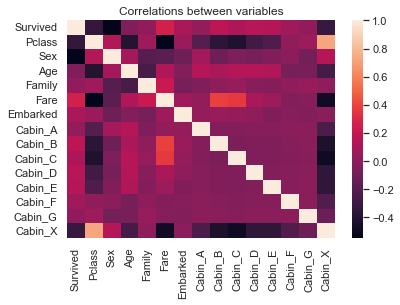

In [667]:
# Correlations with cleaned data set
sns.heatmap(data=titanic_cleaned.corr()).set(title='Correlations between variables')
plt.savefig('Correlations.png',bbox_inches='tight')

In [668]:
#plt.figure(figsize=(15,7))
#sns.heatmap(titanic_cleaned.corr(),linewidths=5, annot=True)

C:\Users\52333\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 12.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\52333\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 26.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


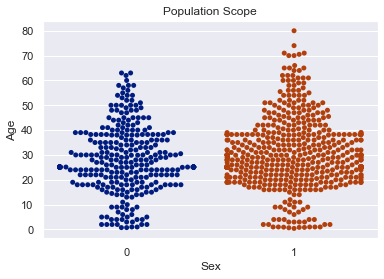

In [669]:
# Swarmplot
sns.swarmplot(data=titanic_data,x='Sex',y='Age', palette='dark').set(title="Population Scope")
plt.savefig('PopulationScope.png',bbox_inches='tight')

In [670]:
# Group by to find how many survived
titanic_data.groupby('Sex')['Survived'].sum()

Sex
0    233
1    109
Name: Survived, dtype: int64

In [671]:
# Group by class, survived and gender
titanic_data.groupby(['Pclass', 'Survived', 'Sex']).size()

Pclass  Survived  Sex
1       0         0        3
                  1       77
        1         0       91
                  1       45
2       0         0        6
                  1       91
        1         0       70
                  1       17
3       0         0       72
                  1      300
        1         0       72
                  1       47
dtype: int64

In [672]:
# Function to divide people in different age ranges
age_bins = []
for i in range(0,110,10):
    age_bins.append(i)

titanic_data['AgeGroup'] = pd.cut(titanic_data['Age'], bins=age_bins, right=False)
age_groups_survival = titanic_data[['Survived','AgeGroup']].groupby('AgeGroup', as_index=False).sum()
age_groups_survival['Total'] = titanic_data[['Survived','AgeGroup']].groupby('AgeGroup', as_index=False).count()['Survived']

age_groups_survival

,AgeGroup,Survived,Total
0,"[0, 10)",38,62
1,"[10, 20)",41,102
2,"[20, 30)",115,367
3,"[30, 40)",87,197
4,"[40, 50)",34,89
5,"[50, 60)",20,48
6,"[60, 70)",6,19
7,"[70, 80)",0,6
8,"[80, 90)",1,1
9,"[90, 100)",0,0


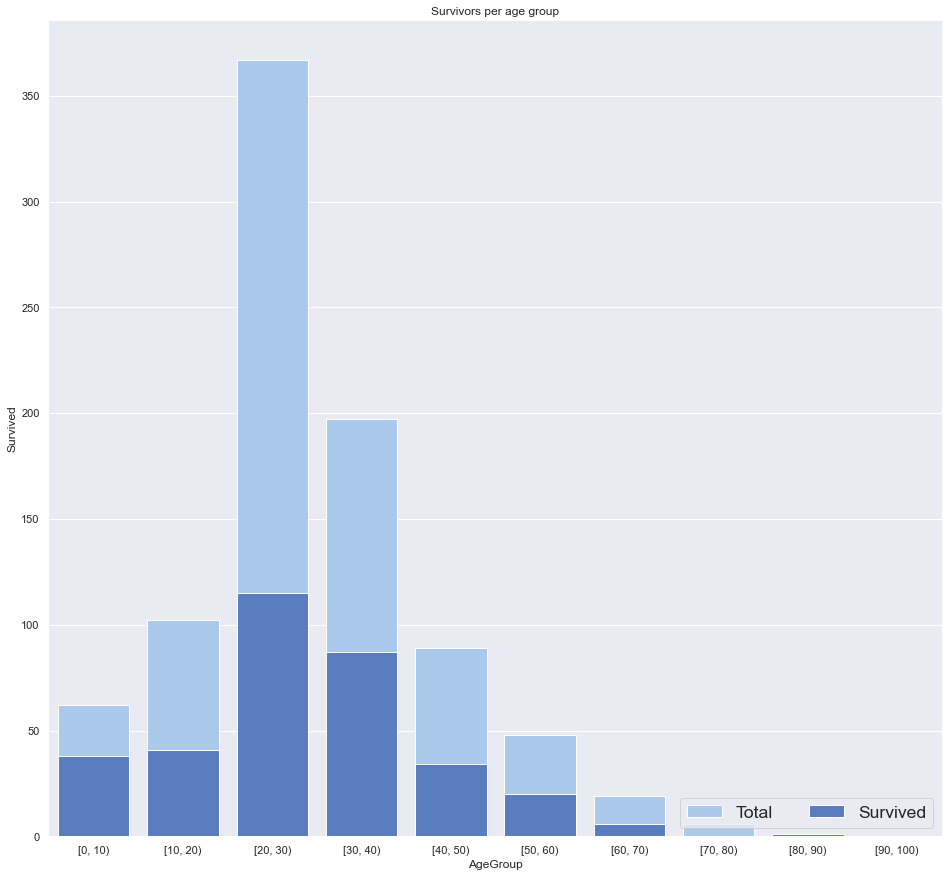

In [673]:
# Barplot to show level survivors vs total
f, ax = plt.subplots(figsize=(16, 15))

sns.set_color_codes("pastel")
sns.barplot(x="AgeGroup", y="Total", data=age_groups_survival,
            label="Total", color="b").set(title="Survivors per age group")

sns.set_color_codes("muted")
sns.barplot(x="AgeGroup", y="Survived", data=age_groups_survival,
            label="Survived", color="b")

sns.set(font_scale=1.6)

ax.legend(ncol=2, loc="lower right", frameon=True)

sns.despine(left=True, bottom=True)

plt.savefig('Age_Groups_Survival.png',bbox_inches='tight')

C:\Users\52333\AppData\Local\Temp\ipykernel_16000\1532053759.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])


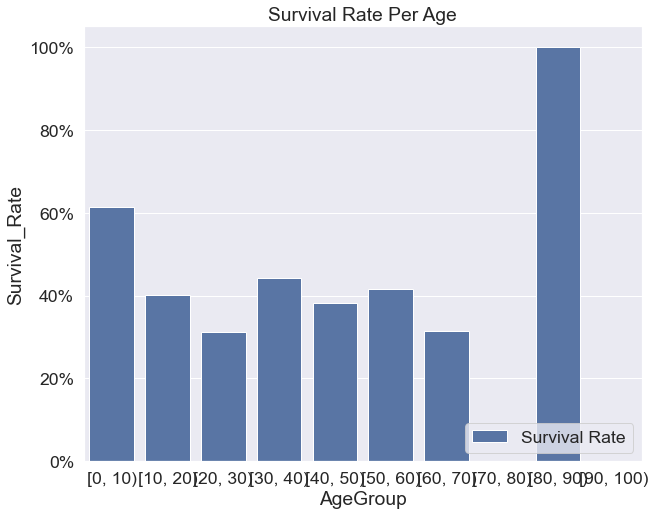

In [674]:
#Barplot to show percentage of survivors per group age
f, ax = plt.subplots(figsize=(10, 8))
age_groups_survival['Survival_Rate'] = age_groups_survival['Survived'] / age_groups_survival['Total']
sns.barplot(x="AgeGroup", y="Survival_Rate", data=age_groups_survival,
            label="Survival Rate", color="b").set(title="Survival Rate Per Age")
            
ax.legend(ncol=2, loc="lower right", frameon=True)

vals = ax.get_yticks()
ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])

sns.set(font_scale=1)

plt.savefig('survival_percentage_age.png',bbox_inches='tight')

In [675]:
# Gender survival groupby
gender_survival = titanic_data[['Sex','Survived']].groupby('Sex', as_index=False).sum()
gender_survival['Total'] = titanic_data[['Sex','Survived']].groupby('Sex', as_index=False).count()['Survived']

gender_survival['Survival_Rate'] = gender_survival['Survived'] / gender_survival['Total'] 

In [676]:
gender_survival

,Sex,Survived,Total,Survival_Rate
0,0,233,314,0.742038
1,1,109,577,0.188908


In [677]:
# Gender survival rate
gender_survival['Survival_Rate']

0    0.742038
1    0.188908
Name: Survival_Rate, dtype: float64

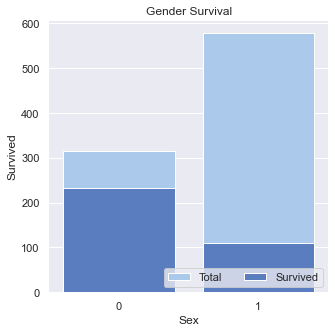

In [678]:
# Plot to find survivors vs total
f, ax = plt.subplots(figsize=(5, 5))

sns.set_color_codes("pastel")
sns.barplot(x="Sex", y="Total", data=gender_survival,
            label="Total", color="b").set(title="Gender Survival")

sns.set_color_codes("muted")
sns.barplot(x="Sex", y="Survived", data=gender_survival,
            label="Survived", color="b")

ax.legend(ncol=2, loc="lower right", frameon=True)

sns.despine(left=True, bottom=True)

plt.savefig('Gender_survival.png',bbox_inches='tight')

C:\Users\52333\AppData\Local\Temp\ipykernel_16000\4184897494.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])


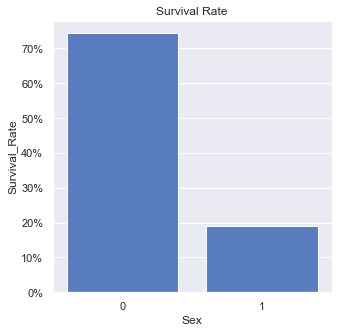

In [679]:
# Percentage of survivors
f, ax = plt.subplots(figsize=(5, 5))
sns.barplot(x="Sex", y="Survival_Rate", data=gender_survival,
            label="Survival Rate", color="b").set(title="Survival Rate")
vals = ax.get_yticks()
ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])
plt.savefig('survival_rate.png',bbox_inches='tight')

### Nice examples 

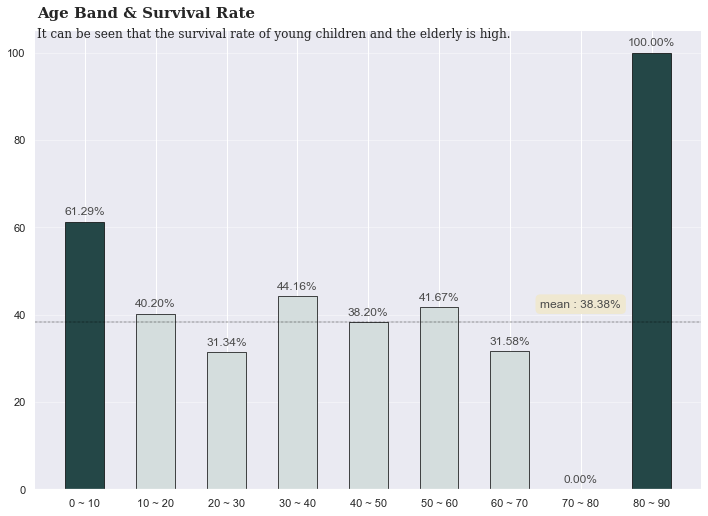

In [680]:
def age_band(num):
    for i in range(1, 100):
        if num < 10*i :  return f'{(i-1) * 10} ~ {i*10}'

titanic_data['age_band'] = titanic_data['Age'].apply(age_band)
titanic_age = titanic_data[['age_band', 'Survived']].groupby('age_band')['Survived'].value_counts().sort_index().unstack().fillna(0)
titanic_age['Survival rate'] = titanic_age[1] / (titanic_age[0] + titanic_age[1]) * 100

fig, ax = plt.subplots(1, 1, figsize=(10, 7))

color_map = ['#d4dddd' for _ in range(9)]
color_map[0] = color_map[8] = '#244747' # color highlight

ax.bar(titanic_age['Survival rate'].index, titanic_age['Survival rate'], 
       color=color_map, width=0.55, 
       edgecolor='black', 
       linewidth=0.7)



for s in ["top","right","left"]:
    ax.spines[s].set_visible(False)


# Annotation Part
for i in titanic_age['Survival rate'].index:
    ax.annotate(f"{titanic_age['Survival rate'][i]:.02f}%", 
                   xy=(i, titanic_age['Survival rate'][i] + 2.3),
                   va = 'center', ha='center',fontweight='light', 
                   color='#4a4a4a')


# mean line + annotation
mean = titanic_data['Survived'].mean() *100
ax.axhline(mean ,color='black', linewidth=0.4, linestyle='dashdot')
ax.annotate(f"mean : {mean :.4}%", 
            xy=('70 ~ 80', mean + 4),
            va = 'center', ha='center',
            color='#4a4a4a',
            bbox=dict(boxstyle='round', pad=0.4, facecolor='#efe8d1', linewidth=0))

# Title & Subtitle    
fig.text(0.06, 1, 'Age Band & Survival Rate', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.06, 0.96, 'It can be seen that the survival rate of young children and the elderly is high.', fontsize=12, fontweight='light', fontfamily='serif')

grid_y_ticks = np.arange(0, 101, 20)
ax.set_yticks(grid_y_ticks)
ax.grid(axis='y', linestyle='-', alpha=0.4)

plt.tight_layout()
plt.show()

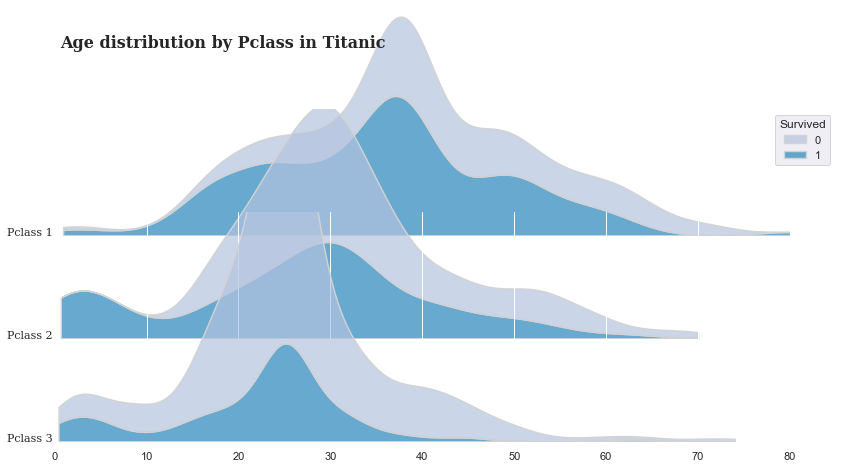

In [681]:
fig = plt.figure(figsize=(14, 8))
gs = fig.add_gridspec(3,1)
gs.update(hspace= -0.55)

axes = list()
colors = ["#022133", "#5c693b", "#51371c"]

for idx, cls, c in zip(range(3), sorted(titanic_data['Pclass'].unique()), colors):
    axes.append(fig.add_subplot(gs[idx, 0]))
    
    # you can also draw density plot with matplotlib + scipy.
    sns.kdeplot(x='Age', data=titanic_data[titanic_data['Pclass']==cls], 
                fill=True, ax=axes[idx], cut=0, bw_method=0.25, 
                lw=1.4, edgecolor='lightgray', hue='Survived', 
                multiple="stack", palette='PuBu', alpha=0.7
               ) 
    
    axes[idx].set_ylim(0, 0.04)
    axes[idx].set_xlim(0, 85)
    
    axes[idx].set_yticks([])
    if idx != 2 : axes[idx].set_xticks([])
    axes[idx].set_ylabel('')
    axes[idx].set_xlabel('')
    
    spines = ["top","right","left","bottom"]
    for s in spines:
        axes[idx].spines[s].set_visible(False)
        
    axes[idx].patch.set_alpha(0)
    axes[idx].text(-0.2,0,f'Pclass {cls}',fontweight="light", fontfamily='serif', fontsize=11,ha="right")
    if idx != 1 : axes[idx].get_legend().remove()
        
fig.text(0.13,0.81,"Age distribution by Pclass in Titanic", fontweight="bold", fontfamily='serif', fontsize=16)

plt.show()    


In [682]:
X_test.head()

,Pclass,Sex,Age,Family,Fare,Embarked,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_X
PassengerId,,,,,,,,,,,,,,
892,3,1,34.5,0,7.8292,3,0,0,0,0,0,0,0,1
893,3,0,47.0,1,7.0000,1,0,0,0,0,0,0,0,1
894,2,1,62.0,0,9.6875,3,0,0,0,0,0,0,0,1
895,3,1,27.0,0,8.6625,1,0,0,0,0,0,0,0,1
896,3,0,22.0,2,12.2875,1,0,0,0,0,0,0,0,1


In [683]:
X_train.head()

,Pclass,Sex,Age,Family,Fare,Embarked,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_X
PassengerId,,,,,,,,,,,,,,
1,3,1,22.0,1,7.2500,1,0,0,0,0,0,0,0,1
2,1,0,38.0,1,71.2833,2,0,0,1,0,0,0,0,0
3,3,0,26.0,0,7.9250,1,0,0,0,0,0,0,0,1
4,1,0,35.0,1,53.1000,1,0,0,1,0,0,0,0,0
5,3,1,35.0,0,8.0500,1,0,0,0,0,0,0,0,1


## KNN

In [816]:
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_roc_curve

In [874]:
# converting categorical variables into numerical while saving in a new d
X  = pd.get_dummies(titanic_data[[ 'Pclass', 'Sex',\
                             'Age', 'Family', 'Fare', 'Cabin', 'Embarked']])
y= titanic_data['Survived']
TestX = pd.get_dummies(titanic_test[[ 'Pclass', 'Sex',\
                             'Age', 'Family', 'Fare', 'Cabin', 'Embarked']])


In [861]:
#KNN
knn = KNeighborsClassifier(n_neighbors = 3) 
knn.fit(X, y)  
Y_pred = knn.predict(X_test)  
acc_knn = round(knn.score(X, y) * 100, 2)

In [869]:
#x_eval = x_test
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state = 101)
knn2=KNeighborsClassifier(n_neighbors = 5) 
knn2.fit(X_train, y_train)  
y_pred2 = knn2.predict(X_test)
print(classification_report(y_test,y_pred2))
print(round(knn2.score(X, y) * 100, 2))
confusion_matrix(y_test, y_pred2)

              precision    recall  f1-score   support

           0       0.69      0.81      0.75       154
           1       0.67      0.52      0.58       114

    accuracy                           0.69       268
   macro avg       0.68      0.66      0.67       268
weighted avg       0.68      0.69      0.68       268

75.98


array([[125,  29],
       [ 55,  59]], dtype=int64)

C:\Users\52333\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


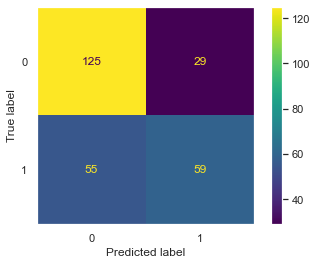

In [870]:
plot_confusion_matrix(knn2, X_test, y_test)  
plt.grid(False)

In [863]:
knn2.predict(TestX)

array([0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,

## Logistic Regression

In [851]:
logmodel = LogisticRegression()
logmodel.fit(X, y)

Y_pred = logmodel.predict(X_test)

acc_log = round(logmodel.score(X_train, y_train) * 100, 2)

C:\Users\52333\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [819]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state = 101)
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
Y_pred = logmodel.predict(X_test)
print(classification_report(y_test, Y_pred))
confusion_matrix(y_test, Y_pred)

              precision    recall  f1-score   support

           0       0.78      0.88      0.83       154
           1       0.80      0.68      0.73       114

    accuracy                           0.79       268
   macro avg       0.79      0.78      0.78       268
weighted avg       0.79      0.79      0.79       268



C:\Users\52333\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [820]:
confusion_matrix(y_test, Y_pred)


array([[135,  19],
       [ 37,  77]], dtype=int64)

In [821]:
#logmodel = LogisticRegression()
#logmodel.fit(X_train, Y_train)

#Y_pred = logmodel.predict(X_test)

acc_log = round(logmodel.score(X_train, y_train) * 100, 2)

C:\Users\52333\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


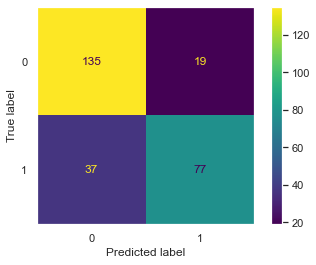

In [822]:
plot_confusion_matrix(logmodel, X_test, y_test)  
plt.grid(False)

In [871]:
logmodel.predict(TestX)

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

## Discriminant Analysis

In [852]:
lda = LinearDiscriminantAnalysis()
lda.fit(X, y)
lda.predict(X_test)
acc_lda = round(lda.score(X, y) * 100, 2)
acc_lda

81.14

In [826]:
print(lda.predict(X_test))

[0 1 1 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0
 0 0 1 0 1 1 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 0 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0
 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 1 1 1 1 1 1 0 0 0 0 1 0 0 1 1 1 1 1 0 0
 0 0 0 1 0 1 0 0 1 1 0 1 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 0
 0 0 1 1 0 0 0 0 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 1 1
 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 1 1
 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 1 1 0 0 1 1 0 0 1 1 0 1 0 0 0 0 0 0 1
 0 0 1 0 0 1 0 0 1]


C:\Users\52333\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


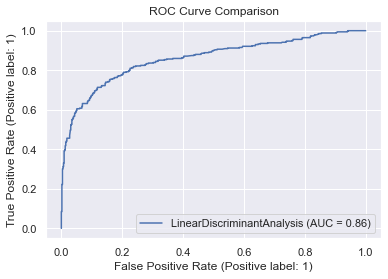

In [834]:
roc_lda = plot_roc_curve(estimator=lda, X=X, y=y)
#roc_log_reg = plot_roc_curve(estimator=logmodel, X=X, y=y, ax=roc_lda.ax_)
plt.title("ROC Curve Comparison")
plt.show()

In [806]:
#from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
#model = LinearDiscriminantAnalysis()
#res = model.fit(X, y).transform(X)
#y_pred= model.predict(X)
#model.decision_function(X)
#from sklearn.metrics import confusion_matrix
#confusion_matrix = confusion_matrix(X_test, y_pred)
#print(confusion_matrix)

In [875]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state = 101)
clf = LinearDiscriminantAnalysis()
clf.fit(X_train, y_train)
clf.score(X_train,y_train)

0.8250401284109149

In [877]:
y_pred=clf.predict(X_test)
print(classification_report(y_test,y_pred))
confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.77      0.88      0.82       154
           1       0.80      0.65      0.71       114

    accuracy                           0.78       268
   macro avg       0.78      0.76      0.77       268
weighted avg       0.78      0.78      0.78       268



array([[135,  19],
       [ 40,  74]], dtype=int64)

C:\Users\52333\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


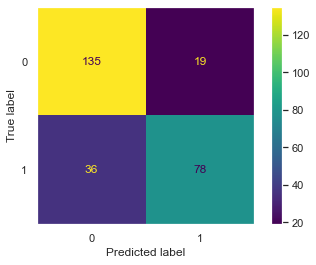

In [878]:
plot_confusion_matrix(logmodel, X_test, y_test)  
plt.grid(False)

In [880]:
clf.predict(TestX)

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

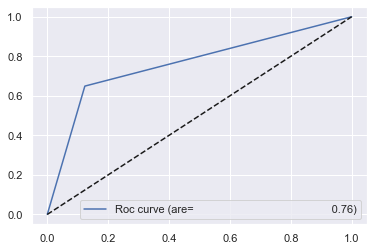

In [842]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr,tpr)
roc_auc
plt.clf()
plt.plot(fpr, tpr, label="Roc curve (are=%50.2f)" % roc_auc)
plt.plot([0,1],[0,1],'k--')
plt.legend(loc="lower right")

## Which model is better

In [853]:
results = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 'Discriminant Analysis'],
    'Score': [ acc_knn, acc_log, acc_lda]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head()

,Model
Score,
84.18,KNN
82.02,Logistic Regression
81.14,Discriminant Analysis


[Text(0.5, 1.0, 'Results')]

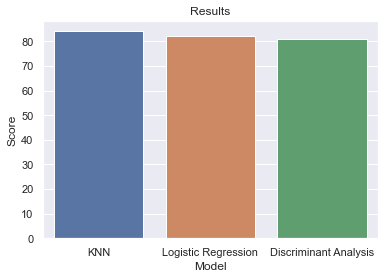

In [857]:
sns.barplot(data=result_df, x='Model',y=result_df.index).set(title="Results")

## Changing variables

C:\Users\52333\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[Text(0.5, 1.0, 'Results without Fare')]

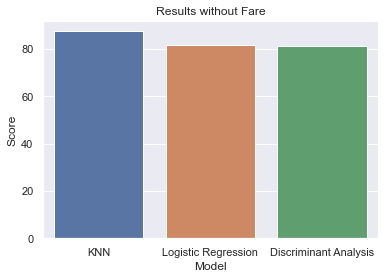

In [859]:
# converting categorical variables into numerical while saving in a new d
X_train2  = pd.get_dummies(titanic_data[[ 'Pclass', 'Sex',\
                             'Age', 'Family', 'Cabin', 'Embarked']])
Y_train2 = titanic_data['Survived']
X_test2 = pd.get_dummies(titanic_test[[ 'Pclass', 'Sex',\
                             'Age', 'Family', 'Cabin', 'Embarked']])

#KNN
knn = KNeighborsClassifier(n_neighbors = 3) 
knn.fit(X_train2, Y_train2)  
Y_pred = knn.predict(X_test2)  
acc_knn = round(knn.score(X_train2, Y_train2) * 100, 2)

#Log Regr
logreg = LogisticRegression()
logreg.fit(X_train2, Y_train2)

Y_pred = logreg.predict(X_test2)

acc_log = round(logreg.score(X_train2, Y_train2) * 100, 2)

#LDA
clf = LinearDiscriminantAnalysis()
clf.fit(X_train2, Y_train2)
clf.predict(X_test2)
acc_lda = round(clf.score(X_train2, Y_train2) * 100, 2)

# Results
results2 = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 'Discriminant Analysis'],
    'Score': [ acc_knn, acc_log, acc_lda]})
result_df2 = results2.sort_values(by='Score', ascending=False)
result_df2 = result_df2.set_index('Score')
result_df2.head()

sns.barplot(data=result_df2, x='Model',y=result_df2.index).set(title="Results without Fare")

[Text(0.5, 1.0, "Model's results")]

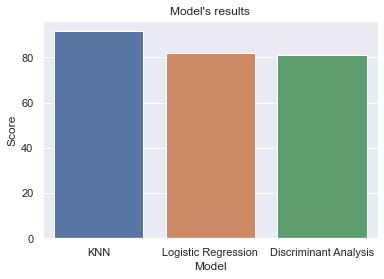

In [705]:
sns.barplot(data=result_df2, x='Model',y=result_df2.index).set(title="Model's results")